In [1]:
using Pkg
Pkg.activate("/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis")
using AvailablePotentialEnergyFramework, PyCall,PyPlot, Statistics, JLD; tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter

 Activating environment at `/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/Project.toml`


PyObject <module 'matplotlib.ticker' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/ticker.py'>

In [2]:
using Colors

In [3]:
"#006BA4"

"#006BA4"

In [4]:
parse.(Colorant,["#006BA4", "#FF800E", "#ABABAB", "#595959", "#5F9ED1", "#C85200", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"])

In [5]:
#default_cycler = PyPlot.matplotlib.rcsetup.cycler(color=["#006BA4", "#FF800E", "#ABABAB", "#595959", "#5F9ED1", "#C85200", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"]) + PyPlot.matplotlib.rcsetup.cycler(linestyle=["-", "--", "-.","-", "--", "-.", "-", "--", "-.","-"])
#PyPlot.rc("axes",prop_cycle=default_cycler)

In [6]:
function wong_colors(alpha = 1.0)
    colors = [
        #RGB(0/255, 0/255, 0/255), # black
        RGB(230/255, 159/255, 0/255), # orange
        RGB(86/255, 180/255, 233/255), # blue        
        RGB(0/255, 158/255, 115/255), # green
        #RGB(240/255, 228/255, 66/255), # yellow
        RGB(0/255, 114/255, 178/255), # blue
        RGB(213/255, 94/255, 0/255), # vermillion
        RGB(204/255, 121/255, 167/255), # reddish purple
    ]
#    @. RGB(red(colors), green(colors), blue(colors))
end

wong_colors (generic function with 2 methods)

In [7]:
default_cycler = PyPlot.matplotlib.rcsetup.cycler(color=hex.(wong_colors())) + PyPlot.matplotlib.rcsetup.cycler(linestyle=["-", "--", "-.","-", "--", "-."])
PyPlot.rc("axes",prop_cycle=default_cycler)

In [8]:
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"
data_dir = "/global/cscratch1/sd/aramreye/for_postprocessing/ApeBudgetOutputs_vartropo/"
data_dir_nonudge = "/global/cscratch1/sd/aramreye/for_postprocessing/ApeBudgetOutputs_50days/"

"/global/cscratch1/sd/aramreye/for_postprocessing/ApeBudgetOutputs_50days/"

In [9]:
function filter_n_times(x,smooth_time,n)
    n == 0 && return x
	if n == 1
		return filter_array_time(x,smooth_time,3)
	else
        for ii in n:-1:1
 	          x=filter_array_time(x,smooth_time,3)
         end
	end
    x
end

filter_n_times (generic function with 1 method)

In [19]:
# apes_1daysmooth_f5e-4_2km_1000km_homoAll_homoSfc_part_1.jld
function gatherapes(data_dir,exp_name)
            int_ape = Float32[]
            int_ape_ke = Float32[]
            int_ape_dia = Float32[]
            int_ape_rad = Float32[]
            int_ape_ub2 =Float32[]
            int_ape_vb2 = Float32[]
            int_ape_wn2 = Float32[]
            int_ape_rate = Float32[]
            int_ape_Fs = Float32[]
    for iter in 1:24
    file_name = string(exp_name,iter,".jld")
    file_path = joinpath(data_dir,file_name)
        file = jldopen(file_path, "r", mmaparrays=true)
            append!(int_ape,read(file, "int_APE"))
            append!(int_ape_ke,read(file, "int_KE"))
            append!(int_ape_dia,read(file, "int_DIA"))
            append!(int_ape_rad,read(file, "int_RAD"))
            append!(int_ape_ub2,read(file, "int_Ub2"))
            append!(int_ape_vb2,read(file, "int_Vb2"))
            append!(int_ape_wn2,read(file, "int_WN2"))
            append!(int_ape_rate,read(file, "int_APE_rate"))
            append!(int_ape_Fs,read(file, "APE_Fs"))
        close(file)
    end
    residual = int_ape_rate .-  int_ape_rad .-  int_ape_dia .+  int_ape_ub2 .+ int_ape_vb2 .+  int_ape_wn2 .- int_ape_Fs
    return int_ape, int_ape_ke, int_ape_rad, int_ape_dia, int_ape_ub2.+int_ape_vb2, int_ape_wn2, int_ape_Fs, residual, int_ape_rate
end

function gatherapes_nonudge(data_dir,exp_name)
            int_ape = Float32[]
            int_ape_ke = Float32[]
            int_ape_dia = Float32[]
            int_ape_rad = Float32[]
            int_ape_ub2 =Float32[]
            int_ape_vb2 = Float32[]
            int_ape_wn2 = Float32[]
            int_ape_rate = Float32[]
            int_ape_Fs = Float32[]
    for iter in 1:10
    file_name = string(exp_name,iter,".jld")
    file_path = joinpath(data_dir,file_name)
        file = jldopen(file_path, "r", mmaparrays=true)
            append!(int_ape,read(file, "int_APE"))
            append!(int_ape_ke,read(file, "int_KE"))
            append!(int_ape_dia,read(file, "int_DIA"))
            append!(int_ape_rad,read(file, "int_RAD"))
            append!(int_ape_ub2,read(file, "int_Ub2"))
            append!(int_ape_vb2,read(file, "int_Vb2"))
            append!(int_ape_wn2,read(file, "int_WN2"))
            append!(int_ape_rate,read(file, "int_APE_rate"))
            append!(int_ape_Fs,read(file, "APE_Fs"))
        close(file)
    end
    residual = int_ape_rate .-  int_ape_rad .-  int_ape_dia .+  int_ape_ub2 .+ int_ape_vb2 .+  int_ape_wn2 .- int_ape_Fs
    return int_ape, int_ape_ke, int_ape_rad, int_ape_dia, int_ape_ub2.+int_ape_vb2, int_ape_wn2, int_ape_Fs, residual, int_ape_rate
end


gatherapes_nonudge (generic function with 1 method)

In [11]:
int_APE_control = gatherapes(data_dir,"f5e-4_2km_1000km_control")
int_APE_homoRad = gatherapes(data_dir,"f5e-4_2km_1000km_homoRad")
int_APE_homoSfc = gatherapes(data_dir,"f5e-4_2km_1000km_homoSfc")
int_APE_homoRad_homoSfc = gatherapes(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc");
times = range(0,stop=100,length=1200)

0.0:0.08340283569641367:100.0

In [20]:
int_APE_control_nonudge = gatherapes_nonudge(data_dir_nonudge,"f5e-4_2km_1000km_control_nonudge")
int_APE_homoRad_nonudge = gatherapes_nonudge(data_dir_nonudge,"f5e-4_2km_1000km_homoRad_nonudge")
int_APE_homoSfc_nonudge = gatherapes_nonudge(data_dir_nonudge,"f5e-4_2km_1000km_homoSfc_nonudge")
int_APE_homoRad_homoSfc_nonudge = gatherapes_nonudge(data_dir_nonudge,"f5e-4_2km_1000km_homoRad_homoSfc_nonudge");

In [27]:
smooth_window = 30
times_to_smooth = 2
int_APE_control_smooth = filter_n_times.(int_APE_control,smooth_window,times_to_smooth)
int_APE_homoRad_smooth = filter_n_times.(int_APE_homoRad,smooth_window,times_to_smooth)
int_APE_homoSfc_smooth = filter_n_times.(int_APE_homoSfc,smooth_window,times_to_smooth)
int_APE_homoRad_homoSfc_smooth = filter_n_times.(int_APE_homoRad_homoSfc,smooth_window,times_to_smooth)
int_APE_control_nonudge_smooth = filter_n_times.(int_APE_control_nonudge,smooth_window,times_to_smooth)
int_APE_homoRad_nonudge_smooth = filter_n_times.(int_APE_homoRad_nonudge,smooth_window,times_to_smooth)
int_APE_homoSfc_nonudge_smooth = filter_n_times.(int_APE_homoSfc_nonudge,smooth_window,times_to_smooth)
int_APE_homoRad_nonudge_homoSfc_smooth = filter_n_times.(int_APE_homoRad_homoSfc_nonudge,smooth_window,times_to_smooth);

In [22]:
experiment_labels = ["Control" "HomoRad" "HomoSfc" "HomoAll"]
budget_labels = ["APE" "Kinetic e." "Rad" "Convec" "Advec" "W*b" "Surface fluxes" "Residual" "APE change rate"]
plot_labels = ["a" "b" "c" "d" "e"]

1×5 Array{String,2}:
 "a"  "b"  "c"  "d"  "e"

In [23]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=13)
legend_fontsize, plotlabel_fontsize = 15,16
#legend_fontsize, plotlabel_fontsize = 6,8

(15, 16)

In [24]:
#these times come from the notebook time_comparisons_mechanismdenial
genesis_control = 7.625
genesis_homoRad = 11.375
genesis_homoSfc = 15.125
genesis_homoRad_homoSfc = 35.5

35.5

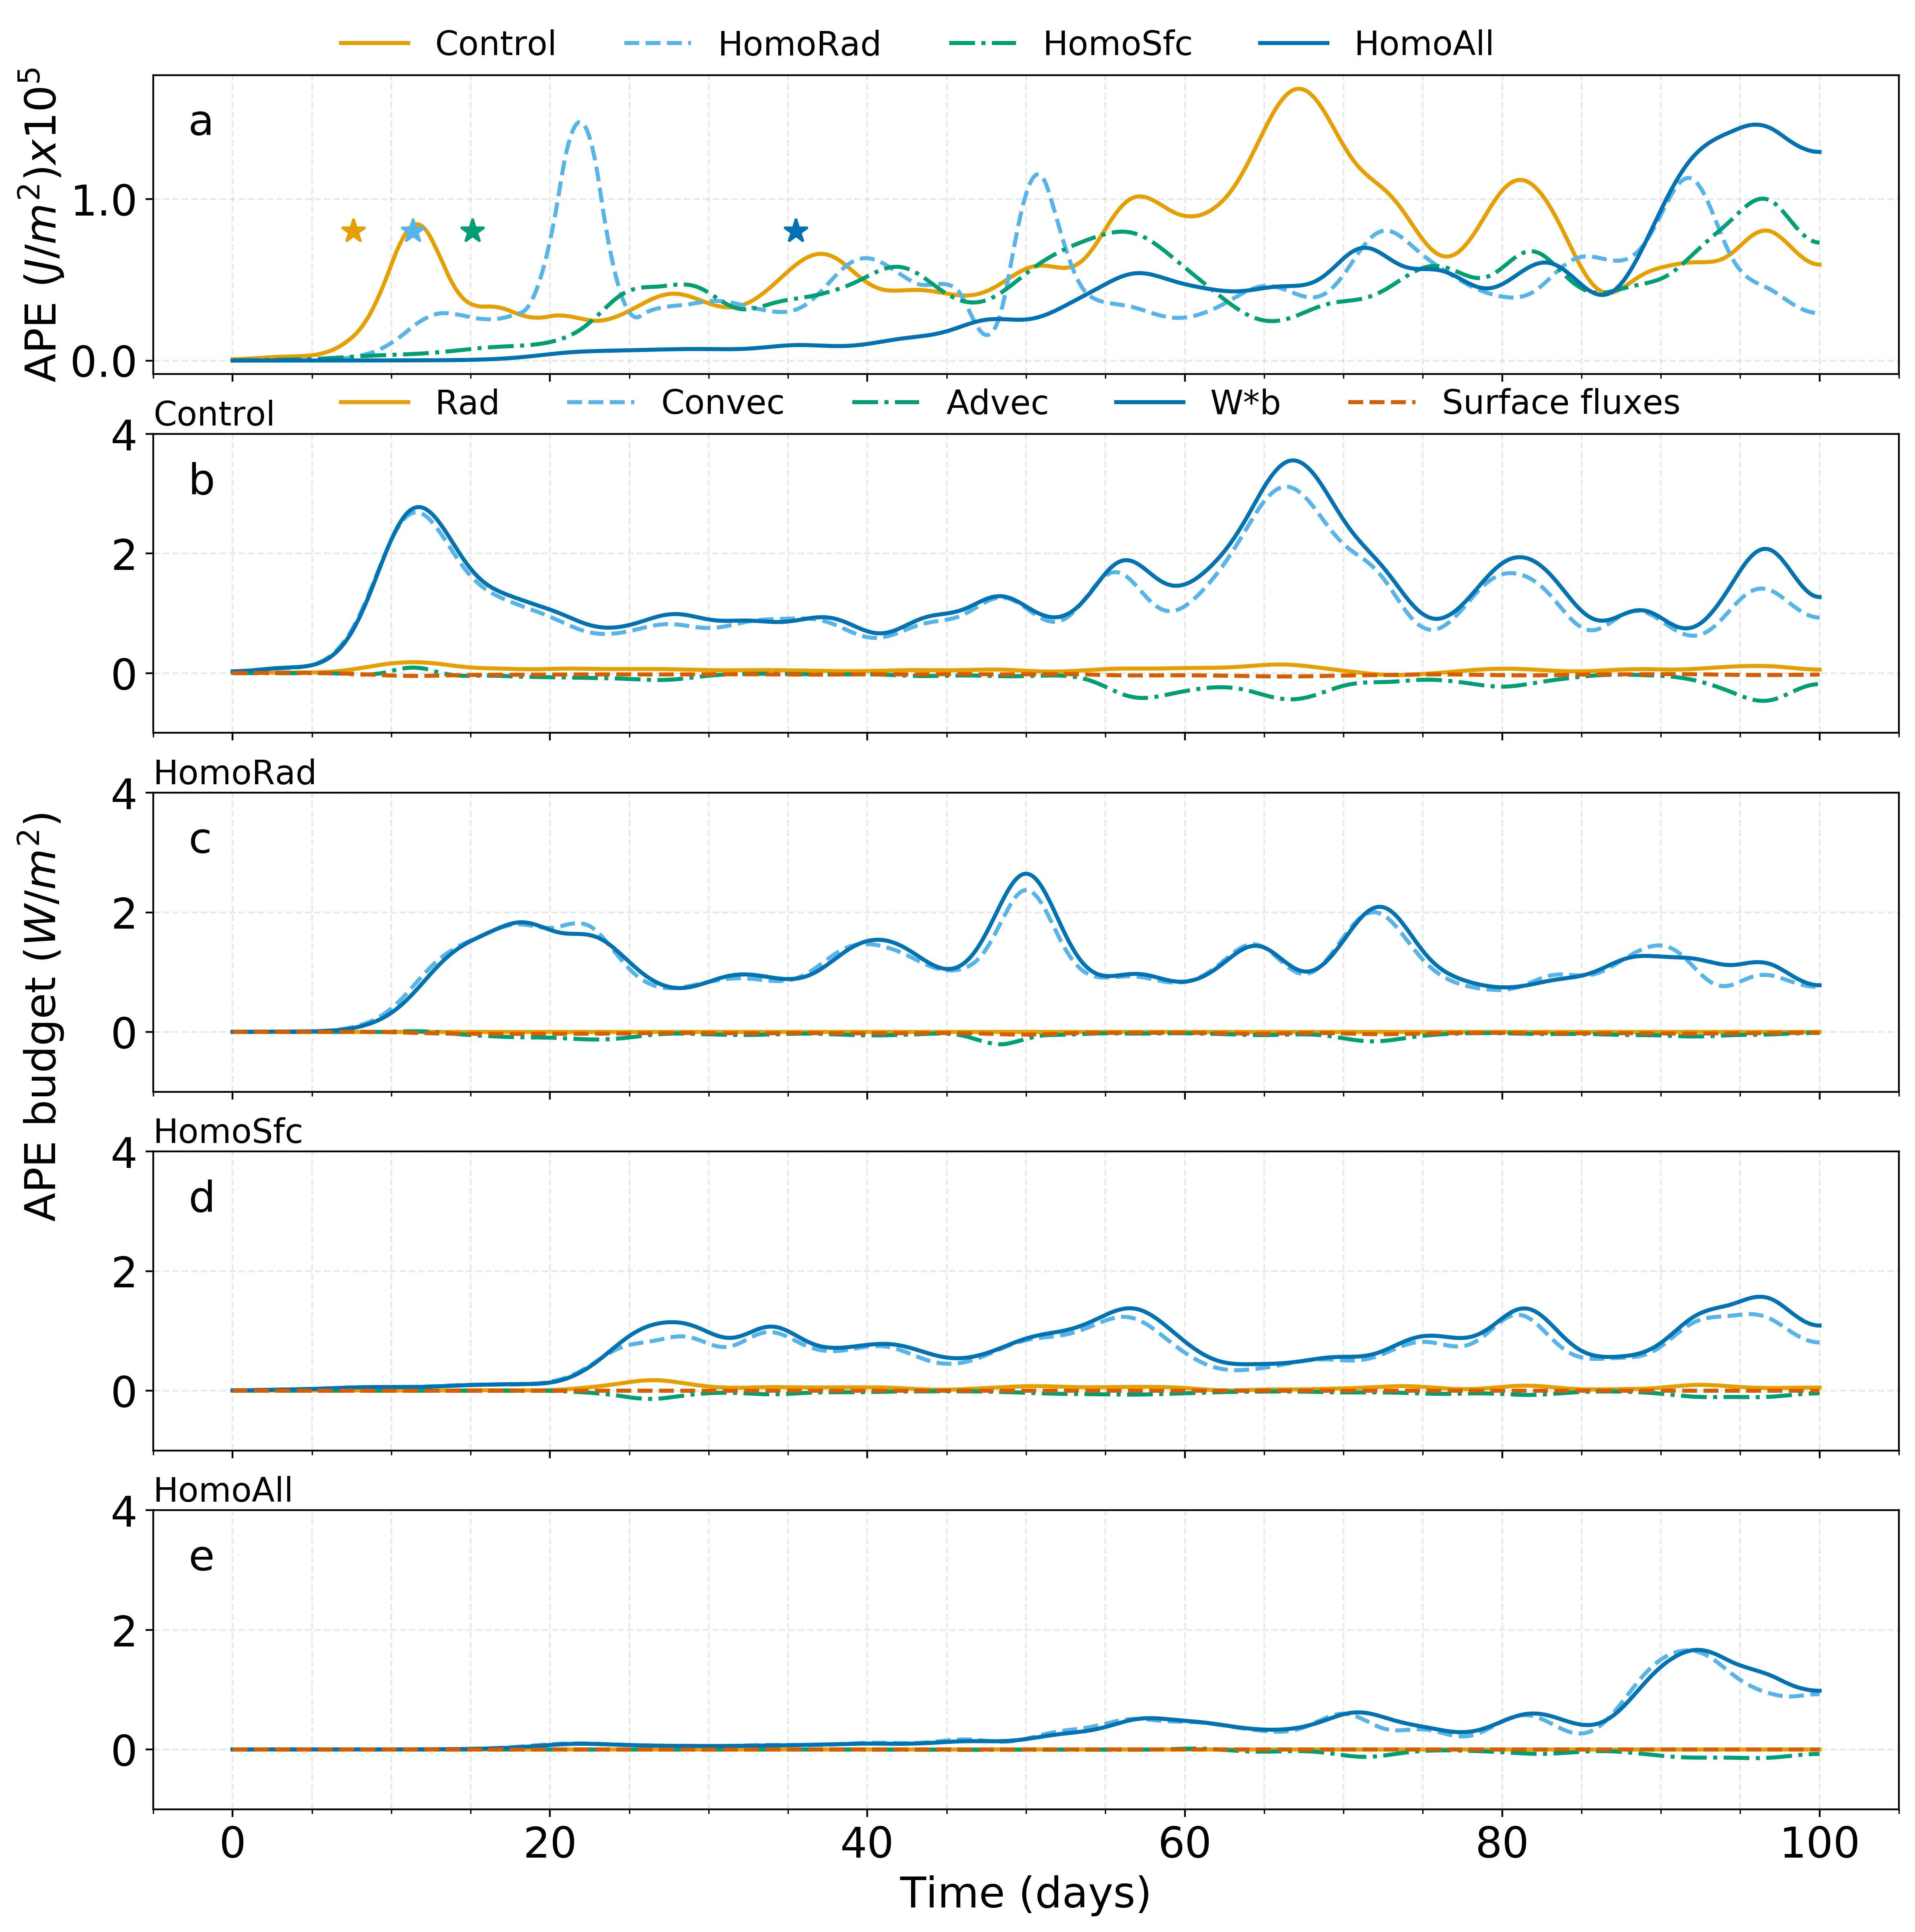

In [25]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=19)
legend_fontsize, plotlabel_fontsize = 15,16
fig, ax = plt.subplots(5,1,sharex=true,figsize=(14,14),dpi=400)
p1, = ax[1].plot(times,1e-5int_APE_control_smooth[1],label = experiment_labels[1])
p2, = ax[1].plot(times,1e-5int_APE_homoRad_smooth[1],label = experiment_labels[2])
p3, = ax[1].plot(times,1e-5int_APE_homoSfc_smooth[1],label = experiment_labels[3])
p4, = ax[1].plot(times,1e-5int_APE_homoRad_homoSfc_smooth[1],label = experiment_labels[4])
ax[1].set_ylabel(string("APE ", L"(J/m^2)",L"x10^5"))
ax[1].yaxis.set_label_coords(-0.05,0.5)
ax[1].yaxis.set_major_formatter(tkr.FormatStrFormatter("%1.1f"))

ax[1].plot(genesis_control,[0.8],"*",markersize=11,color=p1.get_color())
ax[1].plot(genesis_homoRad,[0.8],"*",markersize=11,color=p2.get_color())	
ax[1].plot(genesis_homoSfc,[0.8],"*",markersize=11,color=p3.get_color())	
ax[1].plot(genesis_homoRad_homoSfc,[0.8],"*",markersize=11,color=p4.get_color())

for variable in 3:7
   ax[2].plot(times,int_APE_control_smooth[variable],label=budget_labels[variable])
end    
for variable in 3:7
   ax[3].plot(times,int_APE_homoRad_smooth[variable])
end 
for variable in 3:7
   ax[4].plot(times,int_APE_homoSfc_smooth[variable])
end 

for variable in 3:7
   ax[5].plot(times,int_APE_homoRad_homoSfc_smooth[variable])
end 
for plotid in 1:5
    ax[plotid].annotate(plot_labels[plotid], xy=(0.02, 0.8), xycoords="axes fraction",backgroundcolor="white")
    ax[plotid].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
    if plotid > 1
        ax[plotid].text(-0.0, 1.03, experiment_labels[plotid-1], transform=ax[plotid,1].transAxes, size=legend_fontsize)
    end
end


ax[3].set_ylabel(string("APE budget ", L"(W/m^2)"))
ax[3].yaxis.set_label_coords(-0.05,0.25)      
ax[5].set_xlabel("Time (days)")
[ax[i].set_ylim(-1,4) for i in 2:5]

lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines]

ax[1].legend(loc = (0.1, 1), ncol=4 ,frameon=false,fontsize=legend_fontsize) 
ax[2].legend(loc = (0.1, 1), ncol=8 ,frameon=false,fontsize=legend_fontsize)
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].yaxis.set_minor_locator(plt.NullLocator())

#savefig(joinpath(output_dir,"ape_budgets.png"))
#savefig(joinpath(output_dir,"ape_budgets.eps"))
#savefig(joinpath(output_dir,"ape_budgets.pdf"))

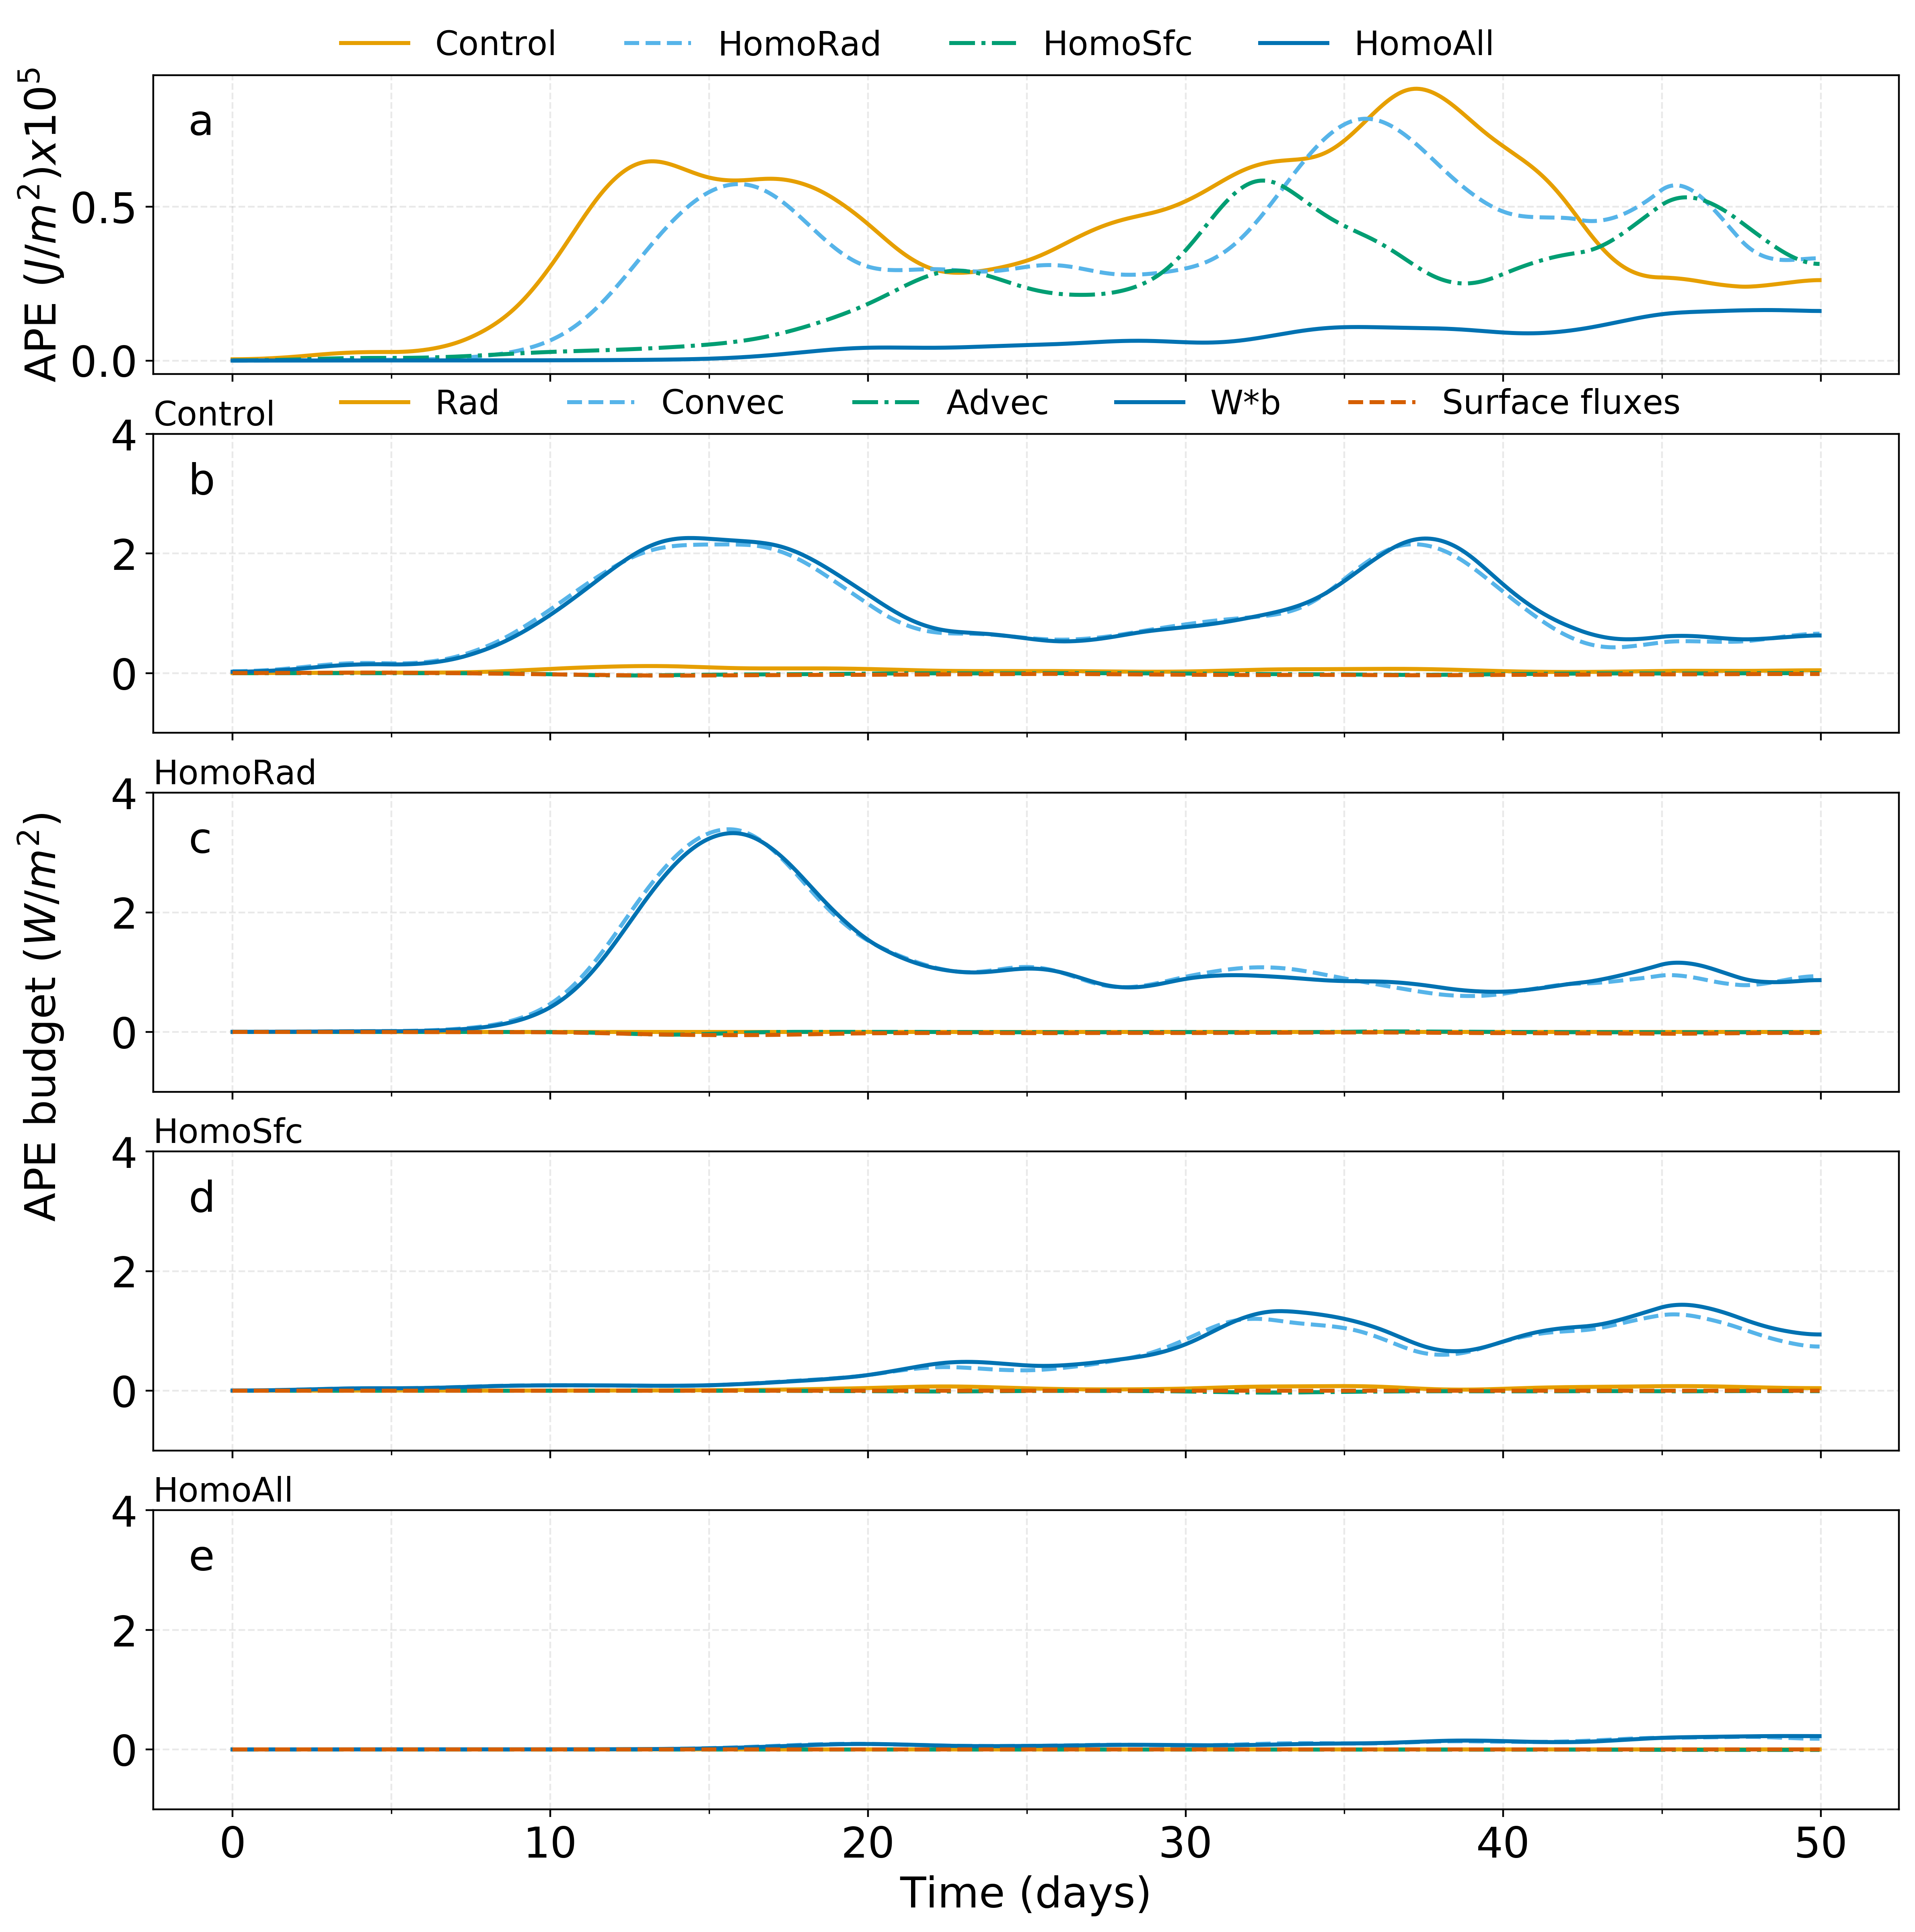

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [29]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=19)
legend_fontsize, plotlabel_fontsize = 15,16
fig, ax = plt.subplots(5,1,sharex=true,figsize=(14,14),dpi=400)
p1, = ax[1].plot(times[1:600],1e-5int_APE_control_nonudge_smooth[1],label = experiment_labels[1])
p2, = ax[1].plot(times[1:600],1e-5int_APE_homoRad_nonudge_smooth[1],label = experiment_labels[2])
p3, = ax[1].plot(times[1:600],1e-5int_APE_homoSfc_nonudge_smooth[1],label = experiment_labels[3])
p4, = ax[1].plot(times[1:600],1e-5int_APE_homoRad_nonudge_homoSfc_smooth[1],label = experiment_labels[4])
ax[1].set_ylabel(string("APE ", L"(J/m^2)",L"x10^5"))
ax[1].yaxis.set_label_coords(-0.05,0.5)
ax[1].yaxis.set_major_formatter(tkr.FormatStrFormatter("%1.1f"))

#ax[1].plot(genesis_control,[0.8],"*",markersize=11,color=p1.get_color())
#ax[1].plot(genesis_homoRad,[0.8],"*",markersize=11,color=p2.get_color())	
#ax[1].plot(genesis_homoSfc,[0.8],"*",markersize=11,color=p3.get_color())	
#ax[1].plot(genesis_homoRad_homoSfc,[0.8],"*",markersize=11,color=p4.get_color())

for variable in 3:7
   ax[2].plot(times[1:600],int_APE_control_nonudge_smooth[variable],label=budget_labels[variable])
end    
for variable in 3:7
   ax[3].plot(times[1:600],int_APE_homoRad_nonudge_smooth[variable])
end 
for variable in 3:7
   ax[4].plot(times[1:600],int_APE_homoSfc_nonudge_smooth[variable])
end 

for variable in 3:7
   ax[5].plot(times[1:600],int_APE_homoRad_nonudge_homoSfc_smooth[variable])
end 
for plotid in 1:5
    ax[plotid].annotate(plot_labels[plotid], xy=(0.02, 0.8), xycoords="axes fraction",backgroundcolor="white")
    ax[plotid].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
    if plotid > 1
        ax[plotid].text(-0.0, 1.03, experiment_labels[plotid-1], transform=ax[plotid,1].transAxes, size=legend_fontsize)
    end
end


ax[3].set_ylabel(string("APE budget ", L"(W/m^2)"))
ax[3].yaxis.set_label_coords(-0.05,0.25)      
ax[5].set_xlabel("Time (days)")
[ax[i].set_ylim(-1,4) for i in 2:5]

lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines]

ax[1].legend(loc = (0.1, 1), ncol=4 ,frameon=false,fontsize=legend_fontsize) 
ax[2].legend(loc = (0.1, 1), ncol=8 ,frameon=false,fontsize=legend_fontsize)
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].yaxis.set_minor_locator(plt.NullLocator())

savefig(joinpath(output_dir,"ape_budgets_nonudge.png"))
savefig(joinpath(output_dir,"ape_budgets_nonudge.eps"))
savefig(joinpath(output_dir,"ape_budgets_nonudge.pdf"))

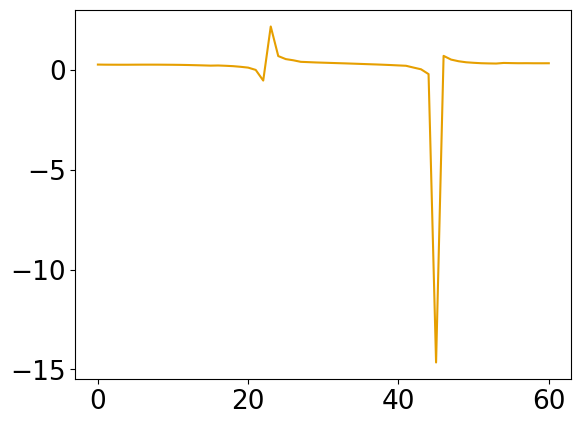

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x2aab51b3b910>

In [20]:
plot(1e-5int_APE_homoRad_nonudge[1][240:300])